In [59]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [62]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [64]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [65]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d22c3a7bc5aacca8fd96c1c53bc614c0


In [66]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | conceicao do araguaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | yenagoa
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | zhigansk
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | berwick
Processing Record 16 of Set 1 | tarut
Processing Record 17 of Set 1 | kyaikto
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | voyvozh
Processing Record 20 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 1 | butaritari
Processing 

Processing Record 35 of Set 4 | kavos
Processing Record 36 of Set 4 | marzuq
Processing Record 37 of Set 4 | sorland
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | sawtell
Processing Record 40 of Set 4 | ranong
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | sechura
Processing Record 43 of Set 4 | camabatela
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | umm kaddadah
Processing Record 46 of Set 4 | mao
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | santa cruz das palmeiras
Processing Record 1 of Set 5 | navolato
Processing Record 2 of Set 5 | tabuk
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | lichinga
Processing Record 5 of Set 5 | bata
Processing Record 6 of Set 5 | killam
Processing Record 7 of Set 5 | college
Processing Record 8 

Processing Record 27 of Set 8 | galesong
Processing Record 28 of Set 8 | north bend
Processing Record 29 of Set 8 | kapuskasing
Processing Record 30 of Set 8 | sabang
Processing Record 31 of Set 8 | baoning
Processing Record 32 of Set 8 | tasiilaq
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | burica
City not found. Skipping...
Processing Record 35 of Set 8 | huarmey
Processing Record 36 of Set 8 | abu zabad
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | pyatnitskoye
Processing Record 40 of Set 8 | kouango
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | santa isabel do rio negro
Processing Record 43 of Set 8 | mashhad
Processing Record 44 of Set 8 | dogondoutchi
Processing Record 45 of Set 8 | lephepe
City not found. Skipping...
Processing Record 46 of Set 8 | meybod
Processing Record 47 of Set 8 | chuy
Processing Record 48 of Set 8 | cayenne
Processing Record 49 of Set 

Processing Record 13 of Set 12 | fort-de-france
Processing Record 14 of Set 12 | chicama
Processing Record 15 of Set 12 | mayo
Processing Record 16 of Set 12 | bayangol
Processing Record 17 of Set 12 | sungaipenuh
Processing Record 18 of Set 12 | zaykovo
Processing Record 19 of Set 12 | cabedelo
Processing Record 20 of Set 12 | menongue
Processing Record 21 of Set 12 | pokhara
Processing Record 22 of Set 12 | bani
Processing Record 23 of Set 12 | placetas
Processing Record 24 of Set 12 | hirara
Processing Record 25 of Set 12 | dunmore town
Processing Record 26 of Set 12 | batangafo
Processing Record 27 of Set 12 | jawhar
Processing Record 28 of Set 12 | pangody
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | ayorou
Processing Record 31 of Set 12 | walvis bay
Processing Record 32 of Set 12 | bianzhuang
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | pryazha
Processing Record 35 of Set 12 | ruidoso
Processing Record 36 of Set 12 | sa

In [68]:
len(city_data)

589

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,63.00,63,75,16.11,AU,2021-03-03 20:51:47
1,Lorengau,-2.0226,147.2712,81.52,78,100,11.63,PG,2021-03-03 20:51:57
2,Albany,42.6001,-73.9662,42.80,49,75,10.36,US,2021-03-03 20:51:27
3,Yulara,-25.2406,130.9889,87.80,19,97,14.97,AU,2021-03-03 20:54:58
4,Avarua,-21.2078,-159.7750,82.40,78,40,6.91,CK,2021-03-03 20:53:29
5,Conceicao Do Araguaia,-8.2578,-49.2647,77.85,90,99,3.51,BR,2021-03-03 20:52:10
6,Rikitea,-23.1203,-134.9692,79.09,77,1,10.09,PF,2021-03-03 20:51:48
7,Lagoa,39.0500,-27.9833,59.67,90,100,17.20,PT,2021-03-03 20:54:39
8,Yenagoa,4.9247,6.2642,80.51,83,98,6.22,NG,2021-03-03 20:52:54
9,Salalah,17.0151,54.0924,75.20,83,0,2.30,OM,2021-03-03 20:54:46


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-03-03 20:51:47,-42.8794,147.3294,63.00,63,75,16.11
1,Lorengau,PG,2021-03-03 20:51:57,-2.0226,147.2712,81.52,78,100,11.63
2,Albany,US,2021-03-03 20:51:27,42.6001,-73.9662,42.80,49,75,10.36
3,Yulara,AU,2021-03-03 20:54:58,-25.2406,130.9889,87.80,19,97,14.97
4,Avarua,CK,2021-03-03 20:53:29,-21.2078,-159.7750,82.40,78,40,6.91
5,Conceicao Do Araguaia,BR,2021-03-03 20:52:10,-8.2578,-49.2647,77.85,90,99,3.51
6,Rikitea,PF,2021-03-03 20:51:48,-23.1203,-134.9692,79.09,77,1,10.09
7,Lagoa,PT,2021-03-03 20:54:39,39.0500,-27.9833,59.67,90,100,17.20
8,Yenagoa,NG,2021-03-03 20:52:54,4.9247,6.2642,80.51,83,98,6.22
9,Salalah,OM,2021-03-03 20:54:46,17.0151,54.0924,75.20,83,0,2.30


In [71]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

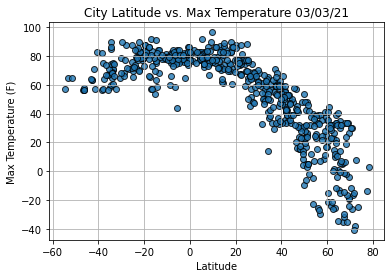

In [73]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

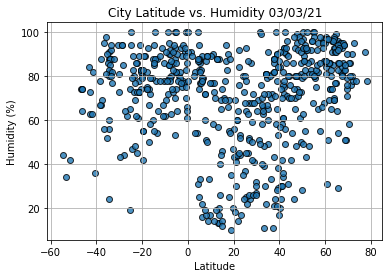

In [82]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

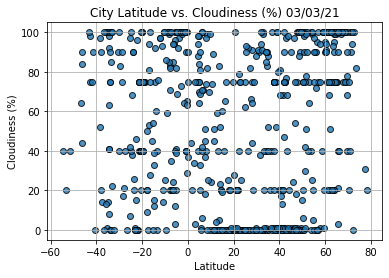

In [83]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

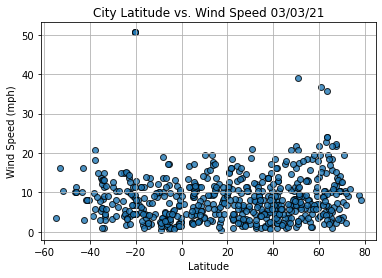

In [84]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
index13 = city_data_df.loc[13]
index13

City                        Tarut
Country                        SA
Date          2021-03-03 20:55:46
Lat                       26.5733
Lng                       50.0369
Max Temp                     64.4
Humidity                       68
Cloudiness                      0
Wind Speed                   5.75
Name: 13, dtype: object

In [112]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [113]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

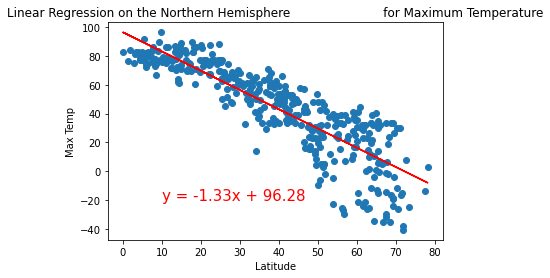

In [137]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,-20))

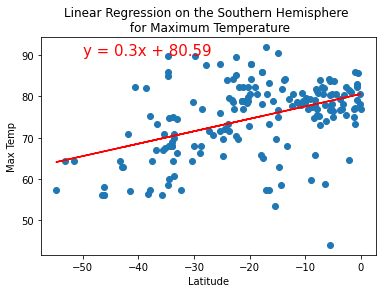

In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

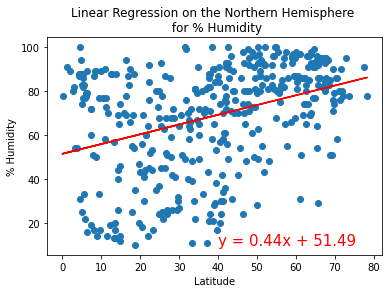

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

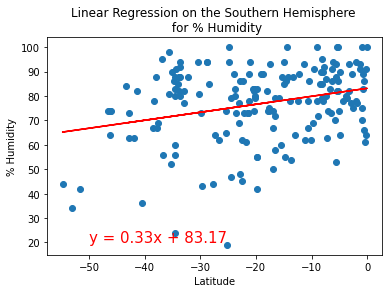

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))

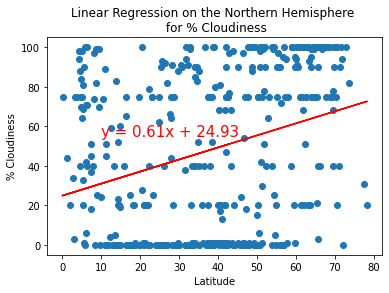

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

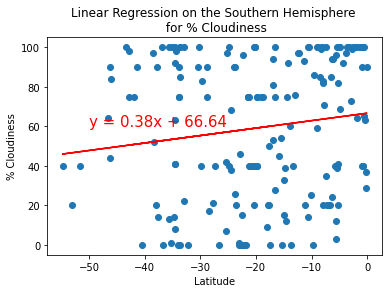

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

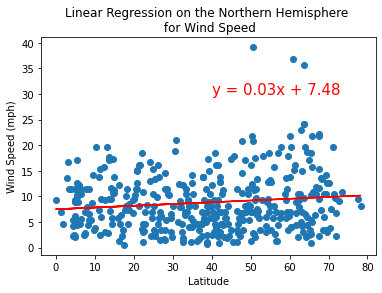

In [136]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,30))

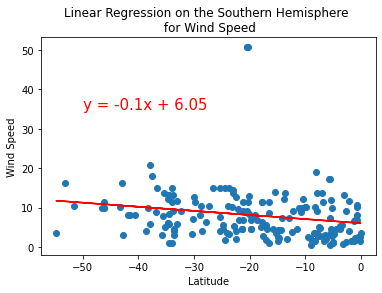

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))